In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [3]:
dfc=pd.read_csv("customer_segmentation_data.csv")
dfm=pd.read_csv("Mall_customers.csv")
dfs=pd.read_csv("shopping_behavior_updated.csv")

In [4]:
dfs

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [5]:
dfc

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [6]:
dfm

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [8]:
cat_col=[i for i in dfc.columns if dfc[i].dtype=='O']
num_col=[i for i in dfc.columns if dfc[i].dtype!='O']

In [9]:
def ord_en(df,cat_col):
    ord=make_pipeline(OrdinalEncoder())
    trans=ColumnTransformer([('',ord,cat_col)])
    return pd.DataFrame(trans.fit_transform(df[cat_col]),columns=trans.get_feature_names_out())

In [10]:
df1=ord_en(dfc,cat_col)

In [11]:
dfc[num_col]

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,1,38,99342,90,3,24,113.53
1,2,21,78852,60,2,42,41.93
2,3,60,126573,30,2,28,424.36
3,4,40,47099,74,9,5,991.93
4,5,65,140621,21,3,25,347.08
...,...,...,...,...,...,...,...
995,996,57,112170,57,6,1,313.64
996,997,23,65337,76,10,23,632.83
997,998,23,113097,40,5,42,75.09
998,999,22,113695,63,7,44,505.16


In [12]:
df1=pd.concat([dfc[num_col],df1],axis=1)

In [13]:
df1

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,__gender,__preferred_category
0,1,38,99342,90,3,24,113.53,0.0,2.0
1,2,21,78852,60,2,42,41.93,0.0,4.0
2,3,60,126573,30,2,28,424.36,0.0,0.0
3,4,40,47099,74,9,5,991.93,2.0,3.0
4,5,65,140621,21,3,25,347.08,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,996,57,112170,57,6,1,313.64,1.0,0.0
996,997,23,65337,76,10,23,632.83,2.0,2.0
997,998,23,113097,40,5,42,75.09,1.0,4.0
998,999,22,113695,63,7,44,505.16,0.0,1.0


In [14]:
df1.rename(columns={'__gender':'gender'},inplace=True)

In [15]:
df1

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender,__preferred_category
0,1,38,99342,90,3,24,113.53,0.0,2.0
1,2,21,78852,60,2,42,41.93,0.0,4.0
2,3,60,126573,30,2,28,424.36,0.0,0.0
3,4,40,47099,74,9,5,991.93,2.0,3.0
4,5,65,140621,21,3,25,347.08,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,996,57,112170,57,6,1,313.64,1.0,0.0
996,997,23,65337,76,10,23,632.83,2.0,2.0
997,998,23,113097,40,5,42,75.09,1.0,4.0
998,999,22,113695,63,7,44,505.16,0.0,1.0


In [16]:
df1.isnull().sum()

id                      0
age                     0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
last_purchase_amount    0
gender                  0
__preferred_category    0
dtype: int64

In [17]:
df1.duplicated().sum()

0

In [18]:
dfm

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
dfm.rename(columns={'CustomerID':'id','Gender':'gender','Age':'age','Spending Score (1-100)':'spending_score'},inplace=True)

In [20]:
dfm.drop(columns='Annual Income (k$)',inplace=True)

In [21]:
ord1=OrdinalEncoder()
dfm['gender']=ord1.fit_transform(dfm[['gender']])

In [22]:
dfm.astype('int')

,id,gender,age,spending_score
0,1,1,19,39
1,2,1,21,81
2,3,0,20,6
3,4,0,23,77
4,5,0,31,40
...,...,...,...,...
195,196,0,35,79
196,197,0,45,28
197,198,1,32,74
198,199,1,32,18


In [23]:
dfm.isnull().sum()

id                0
gender            0
age               0
spending_score    0
dtype: int64

In [24]:
dfm.duplicated().sum()

0

In [25]:
df=pd.concat([df1,dfm],axis=0)

In [26]:
df

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender,__preferred_category
0,1,38,99342.0,90,3.0,24.0,113.53,0.0,2.0
1,2,21,78852.0,60,2.0,42.0,41.93,0.0,4.0
2,3,60,126573.0,30,2.0,28.0,424.36,0.0,0.0
3,4,40,47099.0,74,9.0,5.0,991.93,2.0,3.0
4,5,65,140621.0,21,3.0,25.0,347.08,0.0,1.0
...,...,...,...,...,...,...,...,...,...
195,196,35,NaN,79,NaN,NaN,NaN,0.0,NaN
196,197,45,NaN,28,NaN,NaN,NaN,0.0,NaN
197,198,32,NaN,74,NaN,NaN,NaN,1.0,NaN
198,199,32,NaN,18,NaN,NaN,NaN,1.0,NaN


In [27]:
dfs

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [28]:
cat_col=[i for i in dfs.columns if dfs[i].dtype=='O']
num_col=[i for i in dfs.columns if dfs[i].dtype!='O']

In [29]:
cat_col

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

In [30]:
k=ord_en(dfs,cat_col)

In [31]:
num_col

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [32]:
df2=pd.concat([dfs[num_col],k],axis=1)

In [33]:
df2

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,__Gender,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,55,53,3.1,14,1.0,2.0,1.0,16.0,0.0,7.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0
1,2,19,64,3.1,2,1.0,23.0,1.0,18.0,0.0,12.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0
2,3,50,73,3.1,23,1.0,11.0,1.0,20.0,2.0,12.0,1.0,1.0,2.0,1.0,1.0,2.0,6.0
3,4,21,90,3.5,49,1.0,14.0,2.0,38.0,1.0,12.0,1.0,1.0,3.0,1.0,1.0,4.0,6.0
4,5,45,49,2.7,31,1.0,2.0,1.0,36.0,1.0,21.0,1.0,1.0,2.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,0.0,9.0,1.0,45.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0
3896,3897,52,49,4.5,41,0.0,0.0,0.0,14.0,0.0,23.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0
3897,3898,46,33,2.9,24,0.0,1.0,0.0,29.0,0.0,8.0,1.0,0.0,4.0,0.0,0.0,5.0,5.0
3898,3899,44,77,3.8,24,0.0,17.0,2.0,22.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0


In [34]:
df2.rename(columns={'Customer ID':'id','Age':'age','__Gender':'gender'},inplace=True)

In [35]:
df2

,id,age,Purchase Amount (USD),Review Rating,Previous Purchases,gender,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,55,53,3.1,14,1.0,2.0,1.0,16.0,0.0,7.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0
1,2,19,64,3.1,2,1.0,23.0,1.0,18.0,0.0,12.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0
2,3,50,73,3.1,23,1.0,11.0,1.0,20.0,2.0,12.0,1.0,1.0,2.0,1.0,1.0,2.0,6.0
3,4,21,90,3.5,49,1.0,14.0,2.0,38.0,1.0,12.0,1.0,1.0,3.0,1.0,1.0,4.0,6.0
4,5,45,49,2.7,31,1.0,2.0,1.0,36.0,1.0,21.0,1.0,1.0,2.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,28,4.2,32,0.0,9.0,1.0,45.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0
3896,3897,52,49,4.5,41,0.0,0.0,0.0,14.0,0.0,23.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0
3897,3898,46,33,2.9,24,0.0,1.0,0.0,29.0,0.0,8.0,1.0,0.0,4.0,0.0,0.0,5.0,5.0
3898,3899,44,77,3.8,24,0.0,17.0,2.0,22.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0


In [36]:
df2.isnull().sum()

id                          0
age                         0
Purchase Amount (USD)       0
Review Rating               0
Previous Purchases          0
gender                      0
__Item Purchased            0
__Category                  0
__Location                  0
__Size                      0
__Color                     0
__Season                    0
__Subscription Status       0
__Shipping Type             0
__Discount Applied          0
__Promo Code Used           0
__Payment Method            0
__Frequency of Purchases    0
dtype: int64

In [37]:
df2.duplicated().sum()

0

In [38]:
df

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender,__preferred_category
0,1,38,99342.0,90,3.0,24.0,113.53,0.0,2.0
1,2,21,78852.0,60,2.0,42.0,41.93,0.0,4.0
2,3,60,126573.0,30,2.0,28.0,424.36,0.0,0.0
3,4,40,47099.0,74,9.0,5.0,991.93,2.0,3.0
4,5,65,140621.0,21,3.0,25.0,347.08,0.0,1.0
...,...,...,...,...,...,...,...,...,...
195,196,35,NaN,79,NaN,NaN,NaN,0.0,NaN
196,197,45,NaN,28,NaN,NaN,NaN,0.0,NaN
197,198,32,NaN,74,NaN,NaN,NaN,1.0,NaN
198,199,32,NaN,18,NaN,NaN,NaN,1.0,NaN


In [39]:
df=pd.concat([df,df2],axis=0)

In [40]:
df

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender,__preferred_category,Purchase Amount (USD),...,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,38,99342.0,90.0,3.0,24.0,113.53,0.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,21,78852.0,60.0,2.0,42.0,41.93,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,60,126573.0,30.0,2.0,28.0,424.36,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,40,47099.0,74.0,9.0,5.0,991.93,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,65,140621.0,21.0,3.0,25.0,347.08,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,NaN,NaN,NaN,NaN,NaN,0.0,NaN,28.0,...,45.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0
3896,3897,52,NaN,NaN,NaN,NaN,NaN,0.0,NaN,49.0,...,14.0,0.0,23.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0
3897,3898,46,NaN,NaN,NaN,NaN,NaN,0.0,NaN,33.0,...,29.0,0.0,8.0,1.0,0.0,4.0,0.0,0.0,5.0,5.0
3898,3899,44,NaN,NaN,NaN,NaN,NaN,0.0,NaN,77.0,...,22.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0


In [41]:
df.isnull().sum()/len(df)

id                          0.000000
age                         0.000000
income                      0.803922
spending_score              0.764706
membership_years            0.803922
purchase_frequency          0.803922
last_purchase_amount        0.803922
gender                      0.000000
__preferred_category        0.803922
Purchase Amount (USD)       0.235294
Review Rating               0.235294
Previous Purchases          0.235294
__Item Purchased            0.235294
__Category                  0.235294
__Location                  0.235294
__Size                      0.235294
__Color                     0.235294
__Season                    0.235294
__Subscription Status       0.235294
__Shipping Type             0.235294
__Discount Applied          0.235294
__Promo Code Used           0.235294
__Payment Method            0.235294
__Frequency of Purchases    0.235294
dtype: float64

In [42]:
df.drop(columns=['income','spending_score','membership_years','purchase_frequency','last_purchase_amount','__preferred_category'],inplace=True)

In [43]:
df

,id,age,gender,Purchase Amount (USD),Review Rating,Previous Purchases,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,38,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,40,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,65,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0.0,28.0,4.2,32.0,9.0,1.0,45.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0
3896,3897,52,0.0,49.0,4.5,41.0,0.0,0.0,14.0,0.0,23.0,1.0,0.0,5.0,0.0,0.0,0.0,1.0
3897,3898,46,0.0,33.0,2.9,24.0,1.0,0.0,29.0,0.0,8.0,1.0,0.0,4.0,0.0,0.0,5.0,5.0
3898,3899,44,0.0,77.0,3.8,24.0,17.0,2.0,22.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5100 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5100 non-null   int64  
 1   age                       5100 non-null   int64  
 2   gender                    5100 non-null   float64
 3   Purchase Amount (USD)     3900 non-null   float64
 4   Review Rating             3900 non-null   float64
 5   Previous Purchases        3900 non-null   float64
 6   __Item Purchased          3900 non-null   float64
 7   __Category                3900 non-null   float64
 8   __Location                3900 non-null   float64
 9   __Size                    3900 non-null   float64
 10  __Color                   3900 non-null   float64
 11  __Season                  3900 non-null   float64
 12  __Subscription Status     3900 non-null   float64
 13  __Shipping Type           3900 non-null   float64
 14  __Discount Ap

In [45]:
simp=SimpleImputer(missing_values=np.nan,strategy='median')
df=pd.DataFrame(simp.fit_transform(df),columns=df.columns)

In [46]:
df=df.astype('int')

In [47]:
df

,id,age,gender,Purchase Amount (USD),Review Rating,Previous Purchases,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,38,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
1,2,21,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
2,3,60,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
3,4,40,2,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
4,5,65,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,3896,40,0,28,4,32,9,1,45,0,21,2,0,0,0,0,5,6
5096,3897,52,0,49,4,41,0,0,14,0,23,1,0,5,0,0,0,1
5097,3898,46,0,33,2,24,1,0,29,0,8,1,0,4,0,0,5,5
5098,3899,44,0,77,3,24,17,2,22,2,3,2,0,1,0,0,5,6


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
kmeans=KMeans(n_clusters=2)

In [50]:
cluster=kmeans.fit(df)

In [51]:
np.unique(cluster.labels_)

array([0, 1])

In [52]:
#df['cluster']=cluster.labels_

In [53]:
df

,id,age,gender,Purchase Amount (USD),Review Rating,Previous Purchases,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,38,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
1,2,21,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
2,3,60,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
3,4,40,2,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
4,5,65,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,3896,40,0,28,4,32,9,1,45,0,21,2,0,0,0,0,5,6
5096,3897,52,0,49,4,41,0,0,14,0,23,1,0,5,0,0,0,1
5097,3898,46,0,33,2,24,1,0,29,0,8,1,0,4,0,0,5,5
5098,3899,44,0,77,3,24,17,2,22,2,3,2,0,1,0,0,5,6


In [54]:
#sns.lmplot(data=df,x='Review Rating',y='__Color',hue='cluster')

In [55]:
silhouette_score(df,cluster.labels_)

0.6696896098684006

In [56]:
ine=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    ine.append(kmeans.inertia_)
print(ine)

[7170197170.079607, 1529393976.3916612, 686796049.300389, 408615835.12285817, 250601409.0572729, 173747024.36845338, 132206953.00565389, 100895097.35602176, 80027275.66369054, 66335899.10117808]


Text(0, 0.5, 'inertia')

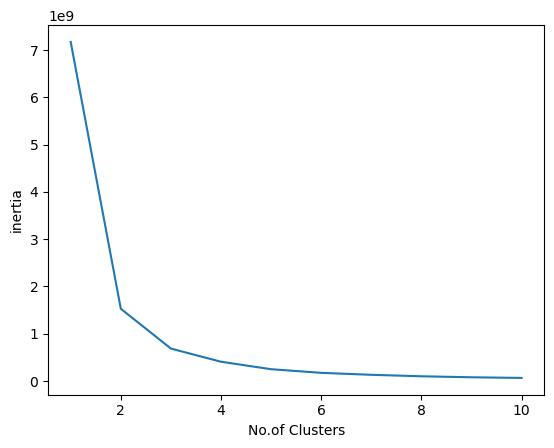

In [57]:
n_clusters=range(1,11)
plt.plot(n_clusters,ine)
plt.xlabel("No.of Clusters")
plt.ylabel("inertia")

In [58]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

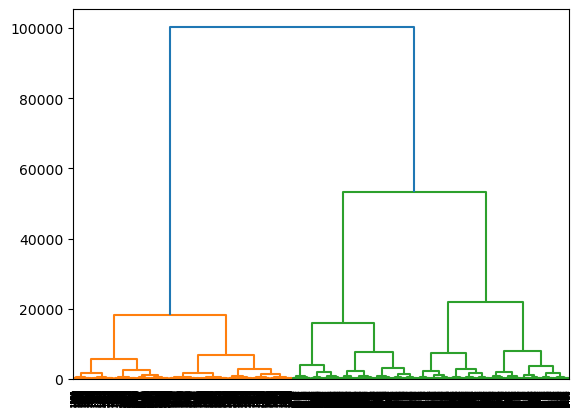

In [59]:
dend=sch.dendrogram(sch.linkage(df,method='ward'))

In [60]:
ag=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [61]:
cluster1=ag.fit(df)

In [62]:
cluster1.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [63]:
##df['agg_cluater']=cluster1.labels_

In [64]:
df

,id,age,gender,Purchase Amount (USD),Review Rating,Previous Purchases,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,1,38,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
1,2,21,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
2,3,60,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
3,4,40,2,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
4,5,65,0,60,3,25,12,1,24,1,12,1,0,3,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,3896,40,0,28,4,32,9,1,45,0,21,2,0,0,0,0,5,6
5096,3897,52,0,49,4,41,0,0,14,0,23,1,0,5,0,0,0,1
5097,3898,46,0,33,2,24,1,0,29,0,8,1,0,4,0,0,5,5
5098,3899,44,0,77,3,24,17,2,22,2,3,2,0,1,0,0,5,6


In [65]:
silhouette_score(df,cluster1.labels_)

0.6112574403439355

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [67]:
std=StandardScaler()
df=pd.DataFrame(std.fit_transform(df),columns=df.columns)

In [68]:
df

,id,age,gender,Purchase Amount (USD),Review Rating,Previous Purchases,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases
0,-1.343696,-0.383157,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996
1,-1.342853,-1.504688,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996
2,-1.342009,1.068235,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996
3,-1.341165,-0.251212,2.225713,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996
4,-1.340322,1.398097,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,1.942487,-0.251212,-1.294565,-1.536457,1.182515,0.532829,-0.480890,-0.001751,1.658163,-1.339291,1.412041,0.623769,-0.510091,-1.754130,-0.699944,-0.699944,1.745663,1.727737
5096,1.943330,0.540456,-1.294565,-0.522447,1.182515,1.245254,-1.910666,-1.277211,-0.813581,-1.339291,1.728774,-0.377245,-0.510091,1.582459,-0.699944,-0.699944,-1.600782,-1.133497
5097,1.944174,0.144622,-1.294565,-1.295026,-1.778853,-0.100438,-1.751802,-1.277211,0.382425,-1.339291,-0.646726,-0.377245,-0.510091,0.915141,-0.699944,-0.699944,1.745663,1.155490
5098,1.945018,0.012677,-1.294565,0.829566,-0.298169,-0.100438,0.790021,1.273710,-0.175711,1.114151,-1.438559,0.623769,-0.510091,-1.086812,-0.699944,-0.699944,1.745663,1.727737


In [69]:
out=[]
eps=np.arange(0.1,3.0,0.1)
min_node=range(1,10)
for ep in eps:
    for mn in min_node:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(df).labels_
        score=silhouette_score(df,labels)
        out.append([ep,mn,score])
print(out)

[[0.1, 1, -0.004169562269281401], [0.1, 2, -0.1941870982905917], [0.1, 3, -0.1844247829886945], [0.1, 4, -0.17781282819791921], [0.1, 5, -0.185038502853338], [0.1, 6, -0.20579479499313474], [0.1, 7, -0.2232627149766147], [0.1, 8, -0.24520059949915704], [0.1, 9, -0.2659793186427858], [0.2, 1, 0.10695103994153662], [0.2, 2, -0.05899654134782518], [0.2, 3, -0.05899654134782518], [0.2, 4, -0.05899654134782518], [0.2, 5, -0.05899654134782518], [0.2, 6, -0.05899654134782518], [0.2, 7, -0.05912500563604555], [0.2, 8, -0.059367802799998266], [0.2, 9, -0.06017636036740623], [0.30000000000000004, 1, 0.10695103994153662], [0.30000000000000004, 2, -0.05899654134782518], [0.30000000000000004, 3, -0.05899654134782518], [0.30000000000000004, 4, -0.05899654134782518], [0.30000000000000004, 5, -0.05899654134782518], [0.30000000000000004, 6, -0.05899654134782518], [0.30000000000000004, 7, -0.05899654134782518], [0.30000000000000004, 8, -0.05899654134782518], [0.30000000000000004, 9, -0.05899654134782518

In [70]:
a=pd.DataFrame(out)

In [71]:
a

,0,1,2
0,0.1,1,-0.004170
1,0.1,2,-0.194187
2,0.1,3,-0.184425
3,0.1,4,-0.177813
4,0.1,5,-0.185039
...,...,...,...
256,2.9,5,-0.123806
257,2.9,6,-0.110470
258,2.9,7,-0.128586
259,2.9,8,-0.109694


In [72]:
sil=a.iloc[:,2].max()

In [73]:
a[a[2]==sil]

,0,1,2
144,1.7,1,0.109649


In [74]:
labels=DBSCAN(eps=0.3,min_samples=10)

In [75]:
k=labels.fit(df)
k.labels_

array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64)

In [76]:
df['DB_cluster']=labels

In [77]:
df

,id,age,gender,Purchase Amount (USD),Review Rating,Previous Purchases,__Item Purchased,__Category,__Location,__Size,__Color,__Season,__Subscription Status,__Shipping Type,__Discount Applied,__Promo Code Used,__Payment Method,__Frequency of Purchases,DB_cluster
0,-1.343696,-0.383157,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996,"DBSCAN(eps=0.3, min_samples=10)"
1,-1.342853,-1.504688,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996,"DBSCAN(eps=0.3, min_samples=10)"
2,-1.342009,1.068235,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996,"DBSCAN(eps=0.3, min_samples=10)"
3,-1.341165,-0.251212,2.225713,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996,"DBSCAN(eps=0.3, min_samples=10)"
4,-1.340322,1.398097,-1.294565,0.008701,-0.298169,-0.021280,-0.004299,-0.001751,-0.016244,-0.112570,-0.013259,-0.377245,-0.510091,0.247823,-0.699944,-0.699944,-0.262204,0.010996,"DBSCAN(eps=0.3, min_samples=10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,1.942487,-0.251212,-1.294565,-1.536457,1.182515,0.532829,-0.480890,-0.001751,1.658163,-1.339291,1.412041,0.623769,-0.510091,-1.754130,-0.699944,-0.699944,1.745663,1.727737,"DBSCAN(eps=0.3, min_samples=10)"
5096,1.943330,0.540456,-1.294565,-0.522447,1.182515,1.245254,-1.910666,-1.277211,-0.813581,-1.339291,1.728774,-0.377245,-0.510091,1.582459,-0.699944,-0.699944,-1.600782,-1.133497,"DBSCAN(eps=0.3, min_samples=10)"
5097,1.944174,0.144622,-1.294565,-1.295026,-1.778853,-0.100438,-1.751802,-1.277211,0.382425,-1.339291,-0.646726,-0.377245,-0.510091,0.915141,-0.699944,-0.699944,1.745663,1.155490,"DBSCAN(eps=0.3, min_samples=10)"
5098,1.945018,0.012677,-1.294565,0.829566,-0.298169,-0.100438,0.790021,1.273710,-0.175711,1.114151,-1.438559,0.623769,-0.510091,-1.086812,-0.699944,-0.699944,1.745663,1.727737,"DBSCAN(eps=0.3, min_samples=10)"


In [78]:
silhouette_score(df,k.labels_)

TypeError: float() argument must be a string or a real number, not 'DBSCAN'